In [66]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')



In [67]:
df=pd.read_csv("edited.csv")
df.head()

,level,goal,equipment,program_length,time_per_workout,total_exercises,Cluster_ID,Unnamed: 7,final_level,Unnamed: 9,final_goal
0,[ Intermediate ],[ Muscle & Sculpting Bodyweight Fitnes...,Full Gym,12.0,90.0,384.0,4.0,Intermediate,Intermediate,Muscle & Sculpting Bodyweight Fitness,Muscle & Sculpting Bodyweight Fitness
1,"[ Advanced , Intermediate ]",[ Bodybuilding ],Full Gym,8.0,60.0,224.0,3.0,"Advanced , Intermediate",Advanced Intermediate,Bodybuilding,Bodybuilding
2,"[ Beginner , Novice , Intermediate ]","[ Athletics , Powerlifting , Powerbuild...",Full Gym,6.0,90.0,237.0,0.0,"Beginner , Novice , Intermediate",Beginner Novice Intermediate,"Athletics , Powerlifting , Powerbuildi...",Athletics Powerlifting Powerbuilding
3,"[ Intermediate , Advanced ]",[ Powerbuilding ],Garage Gym,10.0,70.0,280.0,1.0,"Intermediate , Advanced",Intermediate Advanced,Powerbuilding,Powerbuilding
4,"[ Intermediate , Advanced ]","[ Powerbuilding , Powerlifting , Bodybu...",Full Gym,10.0,80.0,356.0,3.0,"Intermediate , Advanced",Intermediate Advanced,"Powerbuilding , Powerlifting , Bodybui...",Powerbuilding Powerlifting Bodybuild...


# Cluster ID
#0: "Structured Splits & Routines",      e.g., "4 Day Upper Lower", "PPL"
#1: "Branded & Goal-Oriented Programs",  e.g., "Tony's Program", "Aesthetics", "Beginner"
#2: "Hypertrophy & Muscle Focus",        e.g., "Muscle Gains", "Bodybuilding"
#3: "Home & General Fitness Workouts",   e.g., "Home workout", "Simple", "Bodyweight"
#4: "Powerlifting & Performance Focus"   e.g., "Powerlifting", "Strength", "Push Pull Legs"

# Removing columns

In [68]:
df=df.drop(["level","goal","Unnamed: 7","Unnamed: 9"],axis=1)
df.head()

,equipment,program_length,time_per_workout,total_exercises,Cluster_ID,final_level,final_goal
0,Full Gym,12.0,90.0,384.0,4.0,Intermediate,Muscle & Sculpting Bodyweight Fitness
1,Full Gym,8.0,60.0,224.0,3.0,Advanced Intermediate,Bodybuilding
2,Full Gym,6.0,90.0,237.0,0.0,Beginner Novice Intermediate,Athletics Powerlifting Powerbuilding
3,Garage Gym,10.0,70.0,280.0,1.0,Intermediate Advanced,Powerbuilding
4,Full Gym,10.0,80.0,356.0,3.0,Intermediate Advanced,Powerbuilding Powerlifting Bodybuild...


# Renaming columns

In [69]:
df=df.rename(columns={"final_level":"Level","final_goal":"Goal","equipment":"Equipment","program_length":"Program Length","time_per_workout":"Time per Workout","total_exercises":"Total Exercises"})
df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Level,Goal
0,Full Gym,12.0,90.0,384.0,4.0,Intermediate,Muscle & Sculpting Bodyweight Fitness
1,Full Gym,8.0,60.0,224.0,3.0,Advanced Intermediate,Bodybuilding
2,Full Gym,6.0,90.0,237.0,0.0,Beginner Novice Intermediate,Athletics Powerlifting Powerbuilding
3,Garage Gym,10.0,70.0,280.0,1.0,Intermediate Advanced,Powerbuilding
4,Full Gym,10.0,80.0,356.0,3.0,Intermediate Advanced,Powerbuilding Powerlifting Bodybuild...


# Updating float like values to Int

In [70]:
df["Program Length"]=df["Program Length"].astype('Int64')

In [71]:
df["Time per Workout"]=df["Time per Workout"].astype('Int64')

In [72]:
df["Total Exercises"]=df["Total Exercises"].astype('Int64')

In [73]:
df["Cluster_ID"]=df["Cluster_ID"].astype("Int64")
df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Level,Goal
0,Full Gym,12,90,384,4,Intermediate,Muscle & Sculpting Bodyweight Fitness
1,Full Gym,8,60,224,3,Advanced Intermediate,Bodybuilding
2,Full Gym,6,90,237,0,Beginner Novice Intermediate,Athletics Powerlifting Powerbuilding
3,Garage Gym,10,70,280,1,Intermediate Advanced,Powerbuilding
4,Full Gym,10,80,356,3,Intermediate Advanced,Powerbuilding Powerlifting Bodybuild...


# Check for Missing values and Dropping

In [74]:
df.isnull().sum()

Equipment           26
Program Length      26
Time per Workout    25
Total Exercises     25
Cluster_ID          25
Level               33
Goal                33
dtype: int64

In [75]:
df=df.dropna()
df.count()


Equipment           2589
Program Length      2589
Time per Workout    2589
Total Exercises     2589
Cluster_ID          2589
Level               2589
Goal                2589
dtype: int64

# -- Converting Garage Gym and Dumbell Only for At Home --

In [76]:
df["Equipment"]=df["Equipment"].replace({"Dumbbell Only":"At Home","Garage Gym":"At Home"})

In [77]:
df["Equipment"].unique()

array(['Full Gym', 'At Home'], dtype=object)

# -- Removing Novice from the Level Column to only get 3 labels -- 


In [78]:
# By this we Dropped the whole row containing Novice

In [79]:
df=df[~df["Level"].str.contains("Novice",case=False)]

In [80]:
df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Level,Goal
0,Full Gym,12,90,384,4,Intermediate,Muscle & Sculpting Bodyweight Fitness
1,Full Gym,8,60,224,3,Advanced Intermediate,Bodybuilding
3,At Home,10,70,280,1,Intermediate Advanced,Powerbuilding
4,Full Gym,10,80,356,3,Intermediate Advanced,Powerbuilding Powerlifting Bodybuild...
6,Full Gym,12,60,324,3,Intermediate,Bodybuilding


# Multi Hot Encoding Level Column 

In [81]:
# Split the string by spaces or commas 
# Split by spaces and remove empty strings
df['Level'] = df['Level'].str.split(r'\s+').apply(lambda x: [i.strip() for i in x if i.strip() != ''])




mlb_level = MultiLabelBinarizer()
level_encoded = pd.DataFrame(mlb_level.fit_transform(df['Level']),
                             columns=mlb_level.classes_,
                             index=df.index)

# Drop original columns and add encoded ones
df = df.drop(['Level'], axis=1)
df = pd.concat([df,level_encoded], axis=1)

df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Goal,Advanced,Beginner,Intermediate
0,Full Gym,12,90,384,4,Muscle & Sculpting Bodyweight Fitness,0,0,1
1,Full Gym,8,60,224,3,Bodybuilding,1,0,1
3,At Home,10,70,280,1,Powerbuilding,1,0,1
4,Full Gym,10,80,356,3,Powerbuilding Powerlifting Bodybuild...,1,0,1
6,Full Gym,12,60,324,3,Bodybuilding,0,0,1


# Multi hot encoding Goal Column

In [82]:
categories = [
    'Athletics',
    'Bodybuilding',
    'Olympic',
    'Weightlifting',
    'Muscle & Sculpting',
    'Bodyweight Fitness',
    'Powerbuilding',
    'Powerlifting'
]

# Clean the Goal column (remove extra spaces)
df['Goal'] = df['Goal'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Multi-label one-hot encoding
for cat in categories:
    df[cat] = df['Goal'].apply(lambda x: 1 if cat.lower() in x.lower() else 0)

df=df.drop(["Goal"],axis=1)
print(df[categories].head())

   Athletics  Bodybuilding  Olympic  Weightlifting  Muscle & Sculpting  \
0          0             0        0              0                   1   
1          0             1        0              0                   0   
3          0             0        0              0                   0   
4          0             1        0              0                   1   
6          0             1        0              0                   0   

   Bodyweight Fitness  Powerbuilding  Powerlifting  
0                   1              0             0  
1                   0              0             0  
3                   0              1             0  
4                   0              1             1  
6                   0              0             0  


In [83]:
df.head()

,Equipment,Program Length,Time per Workout,Total Exercises,Cluster_ID,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting
0,Full Gym,12,90,384,4,0,0,1,0,0,0,0,1,1,0,0
1,Full Gym,8,60,224,3,1,0,1,0,1,0,0,0,0,0,0
3,At Home,10,70,280,1,1,0,1,0,0,0,0,0,0,1,0
4,Full Gym,10,80,356,3,1,0,1,0,1,0,0,1,0,1,1
6,Full Gym,12,60,324,3,0,0,1,0,1,0,0,0,0,0,0


# Moving Target column (Equipment) to the end

In [84]:
col=df.pop("Equipment")
df["Equipment"]=col
df.head()

,Program Length,Time per Workout,Total Exercises,Cluster_ID,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting,Equipment
0,12,90,384,4,0,0,1,0,0,0,0,1,1,0,0,Full Gym
1,8,60,224,3,1,0,1,0,1,0,0,0,0,0,0,Full Gym
3,10,70,280,1,1,0,1,0,0,0,0,0,0,1,0,At Home
4,10,80,356,3,1,0,1,0,1,0,0,1,0,1,1,Full Gym
6,12,60,324,3,0,0,1,0,1,0,0,0,0,0,0,Full Gym


# Mapping Target Column

In [85]:
df["Equipment"]=df["Equipment"].map({"Full Gym":1,"At Home":0})
df.head()

,Program Length,Time per Workout,Total Exercises,Cluster_ID,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting,Equipment
0,12,90,384,4,0,0,1,0,0,0,0,1,1,0,0,1
1,8,60,224,3,1,0,1,0,1,0,0,0,0,0,0,1
3,10,70,280,1,1,0,1,0,0,0,0,0,0,1,0,0
4,10,80,356,3,1,0,1,0,1,0,0,1,0,1,1,1
6,12,60,324,3,0,0,1,0,1,0,0,0,0,0,0,1


In [86]:
df["Equipment"].value_counts()

Equipment
1    923
0    383
Name: count, dtype: int64

# Plotting Box Plots for Outlier Detection

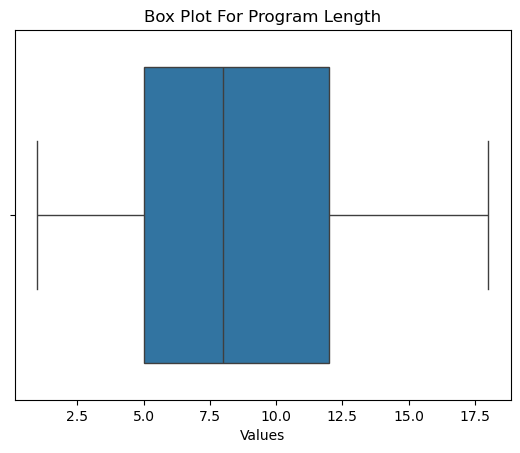

In [87]:
sns.boxplot(x=df["Program Length"])
plt.title("Box Plot For Program Length")
plt.xlabel("Values")
plt.savefig("barplot.png", dpi=300)
plt.show()

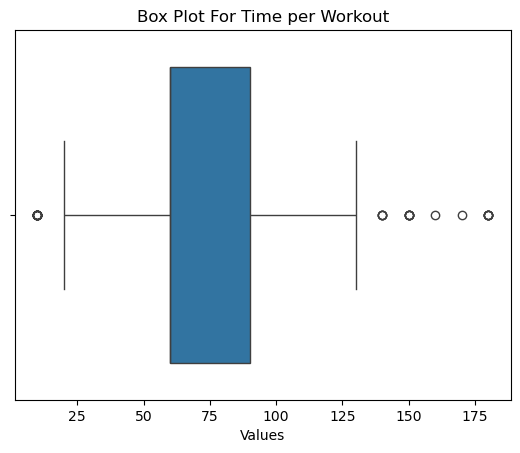

In [88]:
sns.boxplot(x=df["Time per Workout"])
plt.title("Box Plot For Time per Workout")
plt.xlabel("Values")
plt.savefig("barplot.png", dpi=300)
plt.show()

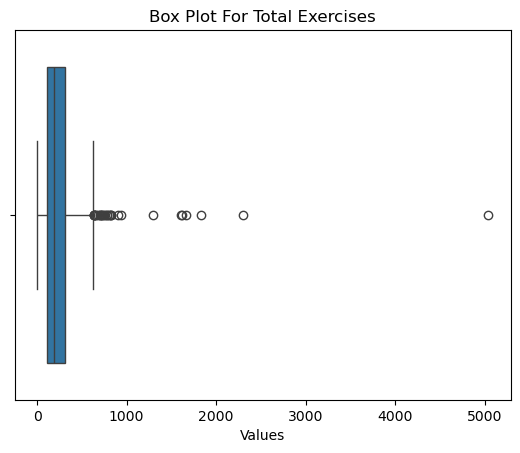

In [89]:
sns.boxplot(x=df["Total Exercises"])
plt.title("Box Plot For Total Exercises")
plt.xlabel("Values")
plt.savefig("barplot.png", dpi=300)
plt.show()

# Outlier Removal for Time per workout

In [91]:
Q1=df["Time per Workout"].quantile(0.25)
Q3=df["Time per Workout"].quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df=df[(df["Time per Workout"]>=lower) &(df["Time per Workout"]<=upper)]


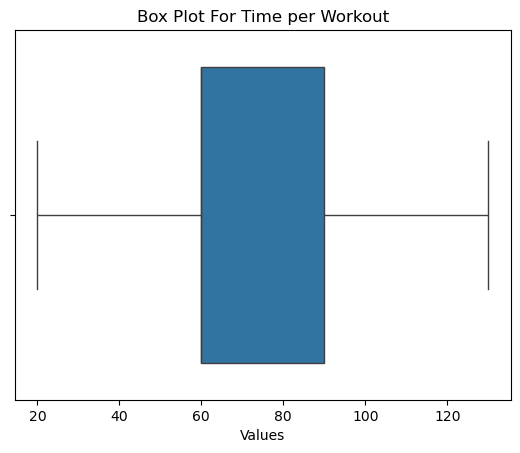

In [92]:
sns.boxplot(x=df["Time per Workout"])
plt.title("Box Plot For Time per Workout")
plt.xlabel("Values")
plt.savefig("barplot.png", dpi=300)
plt.show()

# Outlier Removal for Total Exercises

In [94]:
Q1=df["Total Exercises"].quantile(0.25)
Q3=df["Total Exercises"].quantile(0.75)

IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

df=df[(df["Total Exercises"]>=lower) &(df["Total Exercises"]<=upper)]

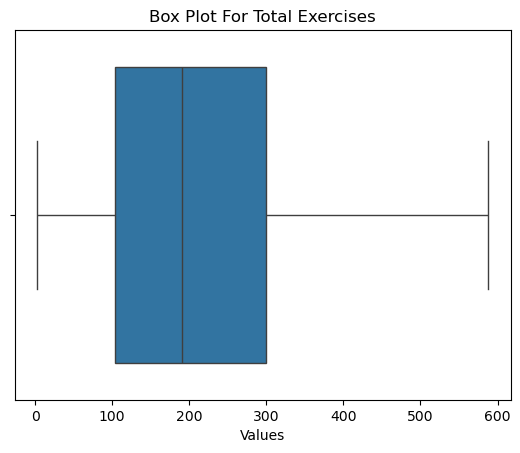

In [95]:
sns.boxplot(x=df["Total Exercises"])
plt.title("Box Plot For Total Exercises")
plt.xlabel("Values")
plt.savefig("barplot.png", dpi=300)
plt.show()

# Scale 

In [96]:
cols_to_scale=["Program Length","Time per Workout","Total Exercises"]

scaler=StandardScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

df.head()

,Program Length,Time per Workout,Total Exercises,Cluster_ID,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting,Equipment
0,0.851282,1.003437,1.327171,4,0,0,1,0,0,0,0,1,1,0,0,1
1,-0.141544,-0.435779,0.104764,3,1,0,1,0,1,0,0,0,0,0,0,1
3,0.354869,0.043960,0.532606,1,1,0,1,0,0,0,0,0,0,1,0,0
4,0.354869,0.523699,1.113250,3,1,0,1,0,1,0,0,1,0,1,1,1
6,0.851282,-0.435779,0.868768,3,0,0,1,0,1,0,0,0,0,0,0,1


In [97]:
df.to_csv("GGG.csv",index=False)

# EDA

# Distribution of Equipment(Target)

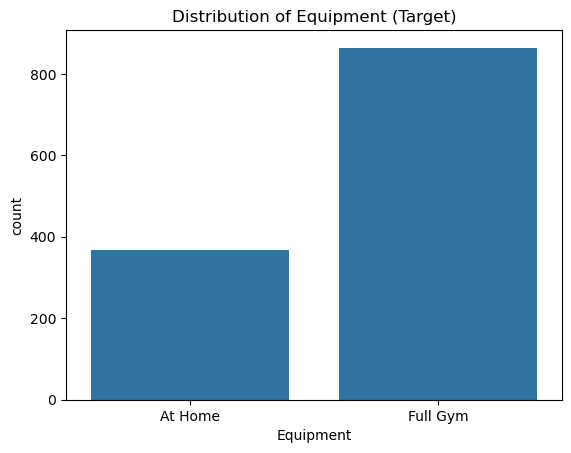

In [98]:
sns.countplot(x="Equipment", data=df)
plt.title("Distribution of Equipment (Target)")
plt.xticks([0, 1], ["At Home", "Full Gym"])
plt.savefig("barplot.png", dpi=300)
plt.show()



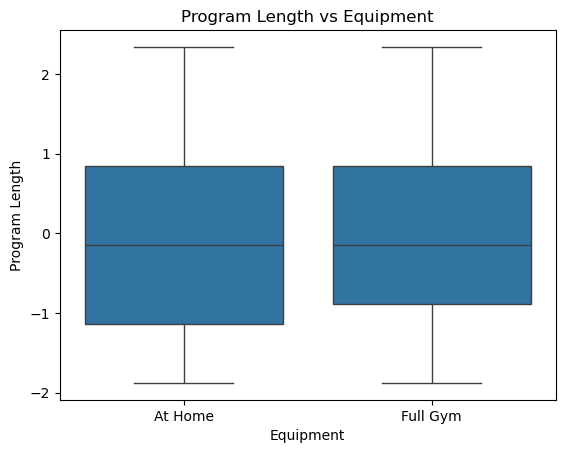

In [99]:
sns.boxplot(x="Equipment", y="Program Length", data=df)
plt.title("Program Length vs Equipment")
plt.xticks([0, 1], ["At Home", "Full Gym"])
plt.savefig("barplot.png", dpi=300)
plt.show()

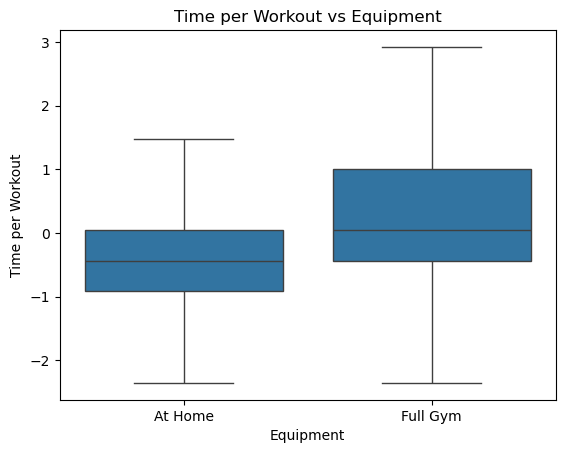

In [100]:
sns.boxplot(x="Equipment", y="Time per Workout", data=df,showfliers=False)
plt.title("Time per Workout vs Equipment")
plt.xticks([0, 1], ["At Home", "Full Gym"])
plt.savefig("barplot.png", dpi=300)
plt.show()

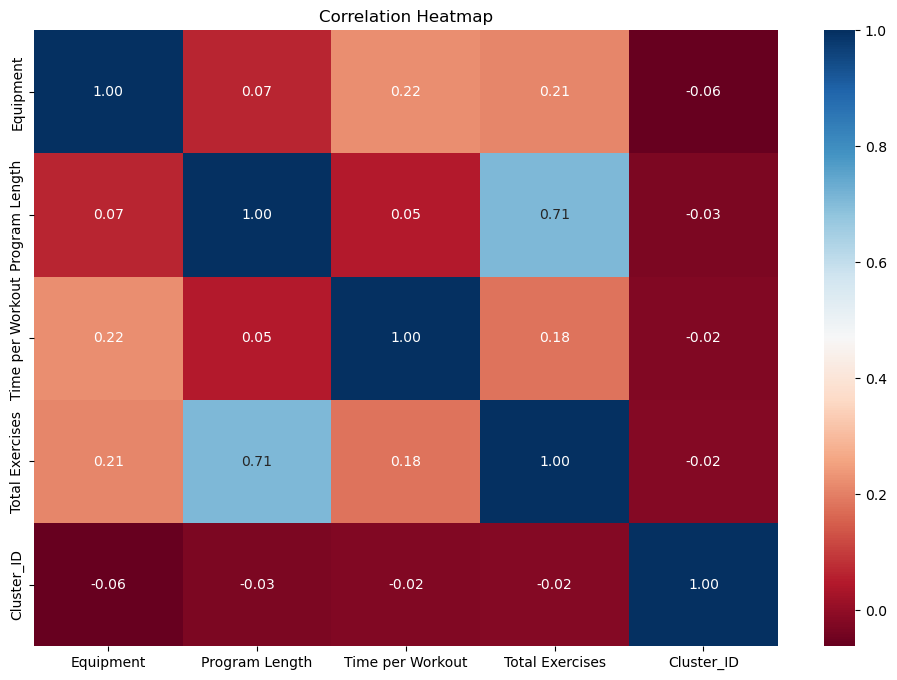

In [101]:
selected_columns=["Equipment","Program Length","Time per Workout","Total Exercises","Cluster_ID"]
corr=df[selected_columns].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="RdBu", fmt=".2f")

plt.title("Correlation Heatmap")
plt.savefig("barplot.png", dpi=300)
plt.show()

In [36]:
# One Hot encoding Cluster ID because in the model training it will think 4>0 as zero and it will be a problem..

In [37]:
# One-hot encode Cluster_ID
df = pd.get_dummies(df, columns=['Cluster_ID'], prefix='Cluster',dtype=int)


In [38]:
df.head()

,Program Length,Time per Workout,Total Exercises,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting,Equipment,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4
0,0.851282,1.003437,1.327171,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
1,-0.141544,-0.435779,0.104764,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,0.354869,0.043960,0.532606,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0.354869,0.523699,1.113250,1,0,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0
6,0.851282,-0.435779,0.868768,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0


In [39]:
col=df.pop("Equipment")
df["Equipment"]=col
df.head()

,Program Length,Time per Workout,Total Exercises,Advanced,Beginner,Intermediate,Athletics,Bodybuilding,Olympic,Weightlifting,Muscle & Sculpting,Bodyweight Fitness,Powerbuilding,Powerlifting,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Equipment
0,0.851282,1.003437,1.327171,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1
1,-0.141544,-0.435779,0.104764,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
3,0.354869,0.043960,0.532606,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0.354869,0.523699,1.113250,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1
6,0.851282,-0.435779,0.868768,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [40]:
X = df.drop(columns=["Equipment"])   # all features besides target
y = df["Equipment"]                  # target


# Feature Selection Model Based (Random forest)

In [41]:
model = RandomForestClassifier()
model.fit(X, y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feat_importances.nlargest(10)
print(top_features)

Total Exercises       0.350606
Time per Workout      0.176417
Program Length        0.145208
Advanced              0.037983
Muscle & Sculpting    0.037536
Bodybuilding          0.035557
Powerbuilding         0.034491
Powerlifting          0.030714
Athletics             0.029641
Intermediate          0.024221
dtype: float64


# Feature Selection (Mutual Information_MI_)

In [42]:
mi = mutual_info_classif(
    X, 
    y, 
    discrete_features='auto',  
    random_state=42            
)

mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print(mi_scores)

Time per Workout      0.042124
Cluster_2             0.033907
Total Exercises       0.027034
Powerlifting          0.016402
Beginner              0.013557
Intermediate          0.013546
Bodyweight Fitness    0.009614
Cluster_0             0.008714
Advanced              0.008429
Bodybuilding          0.003560
Program Length        0.001474
Cluster_4             0.000432
Muscle & Sculpting    0.000120
Powerbuilding         0.000000
Olympic               0.000000
Cluster_1             0.000000
Athletics             0.000000
Cluster_3             0.000000
Weightlifting         0.000000
dtype: float64


In [43]:
# Keep only features with MI > 0

selected_features = mi_scores[mi_scores > 0].index
x= X[selected_features]
x.head()

,Time per Workout,Cluster_2,Total Exercises,Powerlifting,Beginner,Intermediate,Bodyweight Fitness,Cluster_0,Advanced,Bodybuilding,Program Length,Cluster_4,Muscle & Sculpting
0,1.003437,0,1.327171,0,0,1,1,0,0,0,0.851282,1,1
1,-0.435779,0,0.104764,0,0,1,0,0,1,1,-0.141544,0,0
3,0.043960,0,0.532606,0,0,1,0,0,1,0,0.354869,0,0
4,0.523699,0,1.113250,1,0,1,0,0,1,1,0.354869,0,1
6,-0.435779,0,0.868768,0,0,1,0,0,0,1,0.851282,0,0


In [44]:
column_order = [
    "Time per Workout",
    "Total Exercises",
    "Program Length",
    "Beginner",
    "Intermediate",
    "Advanced",
    "Cluster_0",
    "Cluster_2",
    "Cluster_4",
    "Powerlifting",
    "Bodyweight Fitness",
    "Bodybuilding",
    "Muscle & Sculpting"
    
]   
x= x[column_order]

x=x.rename(columns={"Cluster_2":"Cluster_1","Cluster_4":"Cluster_2"})
x.head()

,Time per Workout,Total Exercises,Program Length,Beginner,Intermediate,Advanced,Cluster_0,Cluster_1,Cluster_2,Powerlifting,Bodyweight Fitness,Bodybuilding,Muscle & Sculpting
0,1.003437,1.327171,0.851282,0,1,0,0,0,1,0,1,0,1
1,-0.435779,0.104764,-0.141544,0,1,1,0,0,0,0,0,1,0
3,0.043960,0.532606,0.354869,0,1,1,0,0,0,0,0,0,0
4,0.523699,1.113250,0.354869,0,1,1,0,0,0,1,0,1,1
6,-0.435779,0.868768,0.851282,0,1,0,0,0,0,0,0,1,0


In [45]:
x.to_csv("GGG.csv")

# Cluster ID
#0: "Structured Splits & Routines",      e.g., "4 Day Upper Lower", "PPL"
#1: "Hypertrophy & Muscle Focus",        e.g., "Muscle Gains", "Bodybuilding"
#2: "Powerlifting & Performance Focus"   e.g., "Powerlifting", "Strength", "Push Pull","Legs"

#  SMOTE 

In [46]:
# because in target  "At Home" is low. Doing this to resample only the training set !

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE on training dat

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


print(pd.Series(y_train_res).value_counts())

Equipment
1    691
0    691
Name: count, dtype: int64


# Logistic Regression Model

In [48]:
model_lr=LogisticRegression(random_state=42)
model_lr.fit(X_train_res,y_train_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [49]:
y_train_pred=model_lr.predict(X_train_res)
y_test_pred=model_lr.predict(X_test)

train_acc= accuracy_score(y_train_res,y_train_pred)
train_prec= precision_score(y_train_res, y_train_pred)
train_rec= recall_score(y_train_res, y_train_pred)
train_f1= f1_score(y_train_res, y_train_pred)

test_acc  = accuracy_score(y_test, y_test_pred)

test_prec = precision_score(y_test, y_test_pred)
test_rec  = recall_score(y_test, y_test_pred)
test_f1   = f1_score(y_test, y_test_pred)

print(f"Train -> Accuracy: {train_acc:.3f}, Precision: {train_prec:.3f}, Recall: {train_rec:.3f}, F1: {train_f1:.3f}")
print(f"Test  -> Accuracy: {test_acc:.3f}, Precision: {test_prec:.3f}, Recall: {test_rec:.3f}, F1: {test_f1:.3f}")

Train -> Accuracy: 0.680, Precision: 0.700, Recall: 0.630, F1: 0.663
Test  -> Accuracy: 0.628, Precision: 0.776, Recall: 0.659, F1: 0.713


# Random Forest Model 

In [50]:
model_rf=RandomForestClassifier(random_state=42)
model_rf.fit(X_train_res,y_train_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
y_train_pred=model_rf.predict(X_train_res)
y_test_pred=model_rf.predict(X_test)

train_acc= accuracy_score(y_train_res,y_train_pred)
train_prec= precision_score(y_train_res, y_train_pred)
train_rec= recall_score(y_train_res, y_train_pred)
train_f1= f1_score(y_train_res, y_train_pred)

test_acc  = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec  = recall_score(y_test, y_test_pred)

print(f"Train -> Accuracy: {train_acc:.3f}, Precision: {train_prec:.3f}, Recall: {train_rec:.3f}, F1: {train_f1:.3f}")
print(f"Test  -> Accuracy: {test_acc:.3f}, Precision: {test_prec:.3f}, Recall: {test_rec:.3f}, F1: {test_f1:.3f}")

Train -> Accuracy: 0.995, Precision: 0.994, Recall: 0.996, F1: 0.995
Test  -> Accuracy: 0.672, Precision: 0.761, Recall: 0.775, F1: 0.713


# XG Boost Model

In [52]:
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_res, y_train_res)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [53]:
y_train_pred = model_xgb.predict(X_train_res)
y_test_pred  = model_xgb.predict(X_test)

train_acc= accuracy_score(y_train_res,y_train_pred)
train_prec= precision_score(y_train_res, y_train_pred)
train_rec= recall_score(y_train_res, y_train_pred)
train_f1= f1_score(y_train_res, y_train_pred)

test_acc  = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec  = recall_score(y_test, y_test_pred)
test_f1   = f1_score(y_test, y_test_pred)

print(f"Train -> Accuracy: {train_acc:.3f}, Precision: {train_prec:.3f}, Recall: {train_rec:.3f}, F1: {train_f1:.3f}")
print(f"Test  -> Accuracy: {test_acc:.3f}, Precision: {test_prec:.3f}, Recall: {test_rec:.3f}, F1: {test_f1:.3f}")


Train -> Accuracy: 0.966, Precision: 0.959, Recall: 0.974, F1: 0.966
Test  -> Accuracy: 0.696, Precision: 0.782, Recall: 0.786, F1: 0.784


# SVM Model

In [54]:
model_svm = SVC(kernel='rbf', random_state=42)  # 'linear', 'poly', 'sigmoid' 
model_svm.fit(X_train_res, y_train_res)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [55]:
y_train_pred = model_svm.predict(X_train_res)
y_test_pred  = model_svm.predict(X_test)

train_acc  = accuracy_score(y_train_res, y_train_pred)
train_prec = precision_score(y_train_res, y_train_pred)
train_rec  = recall_score(y_train_res, y_train_pred)
train_f1   = f1_score(y_train_res, y_train_pred)

test_acc  = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec  = recall_score(y_test, y_test_pred)
test_f1   = f1_score(y_test, y_test_pred)

print(f"Train -> Accuracy: {train_acc:.3f}, Precision: {train_prec:.3f}, Recall: {train_rec:.3f}, F1: {train_f1:.3f}")
print(f"Test  -> Accuracy: {test_acc:.3f}, Precision: {test_prec:.3f}, Recall: {test_rec:.3f}, F1: {test_f1:.3f}")


Train -> Accuracy: 0.732, Precision: 0.775, Recall: 0.654, F1: 0.710
Test  -> Accuracy: 0.644, Precision: 0.829, Recall: 0.618, F1: 0.709


## Hyper parameter Tuning in all Models

In [56]:
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    },
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5]
    },
    "XGBoost": {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf", "poly"],
        "gamma": ["scale", "auto", 0.01, 0.1, 1],
        "degree": [2, 3, 4]  # only for poly
    }
}


In [57]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(random_state=42)
}

In [58]:
default_acc = {}
tuned_acc = {}

for name, model in models.items():
    print(f"\n🔧 Tuning {name}...")
    
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    default_acc[name] = accuracy_score(y_test, y_pred)

    # Hyperparameter tuning
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_res, y_train_res)
    best_model = grid.best_estimator_

    y_pred_tuned = best_model.predict(X_test)
    tuned_acc[name] = accuracy_score(y_test, y_pred_tuned)

    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Default Accuracy: {default_acc[name]:.4f}")
    print(f"Tuned Accuracy: {tuned_acc[name]:.4f}")



🔧 Tuning Logistic Regression...
Best params for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Default Accuracy: 0.6275
Tuned Accuracy: 0.6194

🔧 Tuning Random Forest...
Best params for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Default Accuracy: 0.6721
Tuned Accuracy: 0.6883

🔧 Tuning XGBoost...
Best params for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Default Accuracy: 0.6964
Tuned Accuracy: 0.7045

🔧 Tuning SVM...
Best params for SVM: {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Default Accuracy: 0.6437
Tuned Accuracy: 0.6316


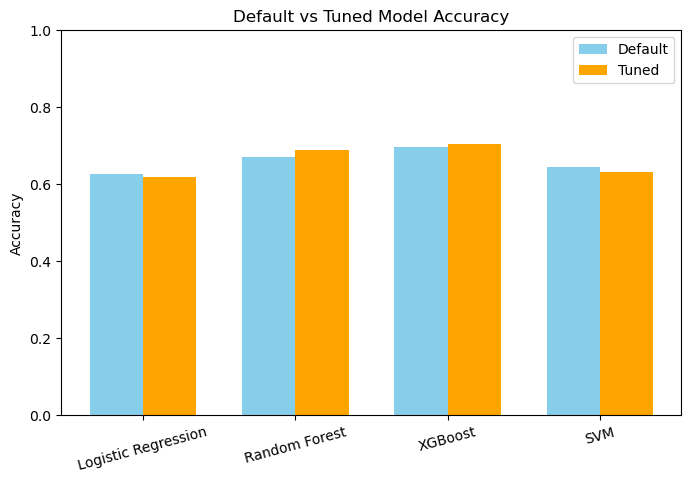

In [59]:
labels = list(default_acc.keys())
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, default_acc.values(), width, label='Default', color='skyblue')
plt.bar(x + width/2, tuned_acc.values(), width, label='Tuned', color='orange')

plt.ylabel('Accuracy')
plt.title('Default vs Tuned Model Accuracy')
plt.xticks(x, labels, rotation=15)
plt.legend()
plt.ylim(0, 1)
plt.show()


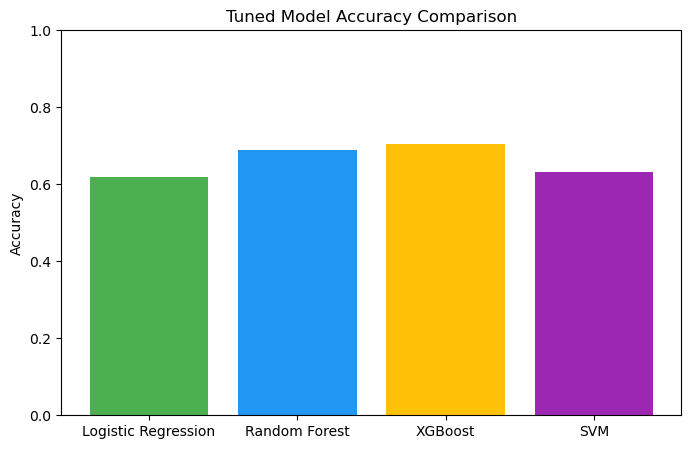

In [60]:
plt.figure(figsize=(8,5))
plt.bar(tuned_acc.keys(), tuned_acc.values(), color=['#4CAF50','#2196F3','#FFC107','#9C27B0'])
plt.ylabel('Accuracy')
plt.title('Tuned Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()


In [61]:
comparison = pd.DataFrame({
    "Model": labels,
    "Default Accuracy": list(default_acc.values()),
    "Tuned Accuracy": list(tuned_acc.values())
})
print("\nModel Comparison:\n")
print(comparison)



Model Comparison:

                 Model  Default Accuracy  Tuned Accuracy
0  Logistic Regression          0.627530        0.619433
1        Random Forest          0.672065        0.688259
2              XGBoost          0.696356        0.704453
3                  SVM          0.643725        0.631579


## Tuning Logistic and SVM again

In [62]:
param_grids = {
    "Logistic Regression": {
        "C": [0.001, 0.01, 0.1, 1],
        "solver": ["liblinear", "lbfgs"]
    },
    "SVM": {
        "C": [0.1, 1, 5],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", 0.01, 0.1]
    }
}

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(random_state=42)
}

default_acc1 = {}
tuned_acc1 = {}

for name, model in models.items():
    print(f"\n🔧 Tuning {name}...")

    # Default model
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    default_acc1[name] = accuracy_score(y_test, y_pred)

    # Hyperparameter tuning
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_res, y_train_res)
    best_model = grid.best_estimator_

    y_pred_tuned = best_model.predict(X_test)
    tuned_acc1[name] = accuracy_score(y_test, y_pred_tuned)

    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Default Accuracy: {default_acc1[name]:.4f}")
    print(f"Tuned Accuracy: {tuned_acc1[name]:.4f}")



🔧 Tuning Logistic Regression...
Best params for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Default Accuracy: 0.6275
Tuned Accuracy: 0.6275

🔧 Tuning SVM...
Best params for SVM: {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
Default Accuracy: 0.6437
Tuned Accuracy: 0.6721


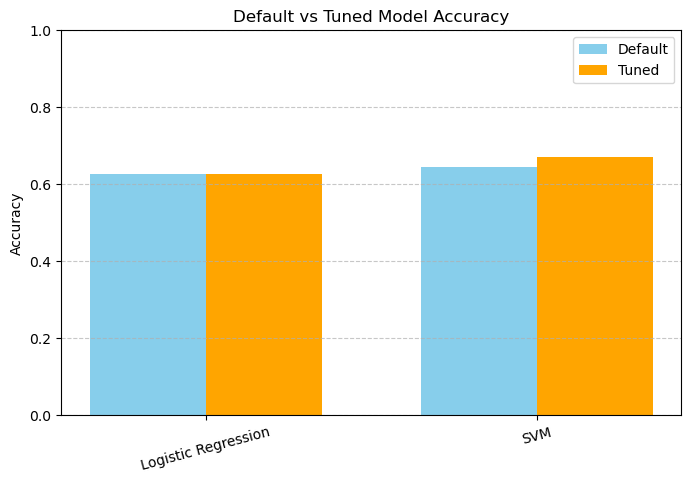

In [63]:
labels = list(default_acc1.keys())
x = np.arange(len(labels))
width = 0.35 

plt.figure(figsize=(8,5))
plt.bar(x - width/2, list(default_acc1.values()), width, label='Default', color='skyblue')
plt.bar(x + width/2, list(tuned_acc1.values()), width, label='Tuned', color='orange')

plt.ylabel('Accuracy')
plt.title('Default vs Tuned Model Accuracy')
plt.xticks(x, labels, rotation=15)
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


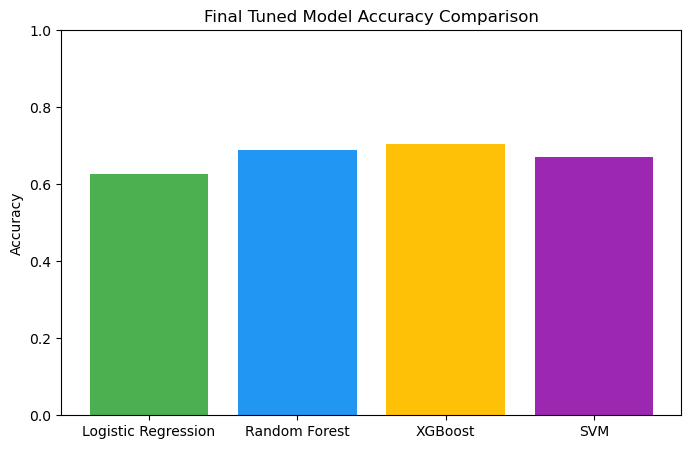

In [64]:
final_tuned_acc_ordered = {
    "Logistic Regression": tuned_acc1["Logistic Regression"],
    "Random Forest": tuned_acc["Random Forest"],  
    "XGBoost": tuned_acc["XGBoost"],             
    "SVM": tuned_acc1["SVM"]
}

# Plot
plt.figure(figsize=(8,5))
plt.bar(final_tuned_acc_ordered.keys(), final_tuned_acc_ordered.values(),
        color=['#4CAF50','#2196F3','#FFC107','#9C27B0'])
plt.ylabel('Accuracy')
plt.title('Final Tuned Model Accuracy Comparison')
plt.ylim(0, 1)
plt.savefig("barplot.png", dpi=300)
plt.show()
